# Una introducción al álgebra lineal para la computación cuántica

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

### Introducción

El álgebra lineal es el lenguaje de la computación cuántica. Por lo tanto, es crucial desarrollar una buena comprensión de los conceptos matemáticos básicos sobre los que se basa el álgebra lineal, para llegar a muchas de las construcciones asombrosas e interesantes que se ven en la computación cuántica. El objetivo de esta sección es crear una base de conocimiento introductorio de álgebra lineal, sobre la cual el lector pueda construir durante su estudio de la computación cuántica.

### Vectores y espacios vectoriales

Comenzaremos nuestra investigación de introducción al álgebra lineal discutiendo primero una de las cantidades matemáticas más importantes en el cálculo cuántico: el vector.

Formalmente, un **vector** $|v\rangle$ se define como elementos de un conjunto conocido como espacio vectorial. Una definición más intuitiva y geométrica es que un vector "es una cantidad matemática con dirección y magnitud". Por ejemplo, considere un vector con componentes $x$ y $y$ de la forma $\begin{pmatrix} 3 \ 5 \end{pmatrix}$. Este vector se puede visualizar como una flecha que apunta en la dirección de $3$ unidades hacia abajo en el eje $x$ y $5$ unidades hacia arriba en el eje $y$:

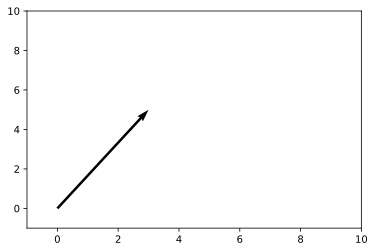

In [2]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

Tenga en cuenta que la "cola" del vector no tiene que estar posicionada en el origen; solo necesita apuntar en la dirección correcta.

En computación cuántica, a menudo tratamos con **vectores de estado** , que son simplemente vectores que apuntan a un punto específico en el espacio que corresponde a un estado cuántico particular. Esto se puede visualizar utilizando una esfera de Bloch. Por ejemplo, un vector que representa el estado de un sistema cuántico podría parecerse a esta flecha, encerrada dentro de la esfera de Bloch, que es el llamado "espacio de estado" de todos los puntos posibles a los que pueden "apuntar" nuestros vectores de estado:

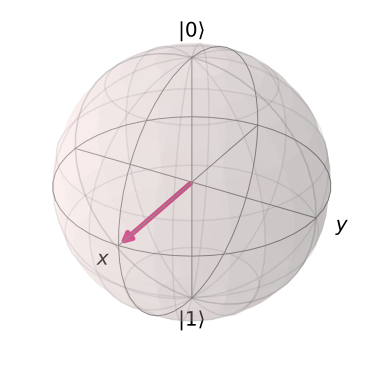

In [3]:
plot_bloch_vector([1, 0, 0])

Este estado particular corresponde a una superposición uniforme entre $|0\rangle$ y $|1\rangle$ (la flecha está a mitad de camino entre $|0\rangle$ en la parte superior y $|1\rangle$ en la parte inferior de la esfera ). Nuestros vectores pueden rotar en cualquier lugar de la superficie de la esfera, y cada uno de estos puntos representa un estado cuántico diferente.

Repasemos nuestra definición más formal de un vector, que es que un vector es un elemento de un espacio vectorial. Ahora debemos definir un espacio vectorial. Un **espacio vectorial** $V$ sobre un **campo** $F$ es un conjunto de objetos (vectores), donde se cumplen dos condiciones. En primer lugar, **la suma vectorial** de dos vectores $|a\rangle, \ |b\rangle \ \in \ V$ producirá un tercer vector $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$, también contenido en $V$. La segunda condición es que **la multiplicación escalar** entre algún $|a\rangle \ \in \V$ y algún $n \ \in \F$, denotado por $n|a\rangle$, también esté contenido dentro de $V$.

Ahora aclararemos esta definición anterior trabajando a través de un ejemplo básico. Demostremos que el conjunto $\mathbb{R}^2$ sobre el campo $\mathbb{R}$ es un espacio vectorial. Afirmamos que

<br>

$$\begin{pmatrix} x_1 \ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_2 \ y_2 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \ y_1 \ + \ y_2 \end{matrix}$$

<br>

está contenido dentro de $\mathbb{R}^2$. Evidentemente, este es el caso, ya que la suma de dos números reales es un número real, lo que hace que ambos componentes del vector recién formado sean números reales; por lo tanto, el vector está contenido en $\mathbb{R}^2$ por definición. También afirmamos que:

<br>

$$n |v\rangle \ = \ \begin{pmatrix} nx \ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$

<br>

Esto también es cierto, ya que el producto de un número real y un número real es un número real, lo que hace que todo el nuevo vector sea real y, por lo tanto, prueba esta afirmación.

### Matrices y operaciones con matrices

Volvamos nuestra atención a otro concepto fundamental: una **matriz** . Las matrices son objetos matemáticos que transforman vectores en otros vectores:

<br>

$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$

<br>

Generalmente, las matrices se escriben como "matrices" de números, con un aspecto similar a este:

<br>

$$M \ = \ \begin{pmatrix} 1 &amp; -2 &amp; 3 \ 1 &amp; 5i &amp; 0 \ 1 \ + \ i &amp; 7 &amp; -4 \end{pmatrix}$$

<br>

Podemos "aplicar" una matriz a un vector realizando una multiplicación de matrices. En general, la multiplicación de matrices entre dos matrices implica tomar la primera fila de la primera matriz y multiplicar cada elemento por su "compañero" en la primera columna de la segunda matriz (el primer número de la fila se multiplica por el primer número de la columna, segundo número de la fila y segundo número de la columna, etc.). La suma de estos nuevos números se convierte en el primer elemento de la primera fila de la nueva matriz. Para completar el resto de la primera fila, repetimos este proceso para la segunda, tercera, etc. columnas de la segunda matriz. Luego tomamos la segunda fila de la primera matriz y repetimos el proceso para cada columna de la segunda matriz, para producir la segunda fila. Realizamos este proceso hasta que hayamos utilizado todas las filas de la primera matriz. La matriz resultante es nuestra nueva matriz. Aquí hay un ejemplo:

<br>

$$\begin{pmatrix} 2 &amp; 0 \ 5 &amp; -1 \end{pmatrix} \begin{pmatrix} -3 &amp; 1 \ 2 &amp; 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)( -3) + (0)(2) &amp; (2)(1) \ + \ (0)(1) \ (5)(-3) + (-1)(2) &amp; (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 y 2 \ -17 y 4 \end{pmatrix}$$

<br>

Para realizar un cálculo cuántico, tenemos un vector de estado cuántico que manipulamos aplicando una matriz a ese vector. Un vector es simplemente una matriz con una columna. Para aplicar una matriz a un vector, por lo tanto, seguimos el mismo procedimiento de multiplicación de matrices descrito anteriormente. Manipulamos qubits en nuestra computadora cuántica aplicando secuencias de **puertas cuánticas** . Cada puerta cuántica se puede expresar como una matriz que se puede aplicar a los vectores de estado, cambiando así el estado. Por ejemplo, una puerta cuántica comúnmente vista es la puerta Pauli-X, que está representada por la siguiente matriz:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix}$$

<br>

Esta puerta actúa de manera similar a la puerta lógica NOT clásica. Mapea el estado base computacional $|0\rangle$ a $|1\rangle$ y $|1\rangle$ a $|0\rangle$ ("voltea" el estado). Escribimos los dos estados base como vectores columna:

<br>

$$|0\rangle \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \ 1 \end{pmatrix}$ PS

<br>

Cuando aplicamos esta matriz a cada uno de los vectores:

<br>

$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix} \begin{pmatrix} 1 \ 0 \end{pmatrix} \ = \ \begin{pmatrix} ( 0)(1) \ + \ (1)(0) \ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \ 1 \end{pmatrix } \ = \ |1\rango$$

<br>

$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix} \begin{pmatrix} 0 \ 1 \end{pmatrix} \ = \ \begin{pmatrix} ( 0)(0) \ + \ (1)(1) \ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix } \ = \ |0\rango$$

<br>

La matriz actúa sobre los vectores de estado como se esperaba.

Dentro de la computación cuántica, a menudo encontramos dos tipos importantes de matrices: matrices **hermitianas** y **unitarias** . El primero es más importante en el estudio de la mecánica cuántica, pero aún es necesario discutirlo en un estudio de computación cuántica. Este último tiene una importancia sin precedentes tanto en la mecánica cuántica como en la computación cuántica. Si quita un solo concepto de esta sección sobre álgebra lineal, debería ser el concepto de matriz unitaria.

Una matriz hermitiana es simplemente una matriz que es igual a su **transpuesta conjugada** (indicada con un símbolo $\dagger$). Esto significa que invertir el signo de los componentes imaginarios de una matriz hermitiana y luego reflejar sus entradas a lo largo de su diagonal principal (desde la esquina superior izquierda hasta la esquina inferior derecha), produce una matriz igual. Por ejemplo, la matriz Pauli-Y, comúnmente utilizada en computación cuántica, es hermitiana:

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 &amp; -i \ i &amp; 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 &amp; -(i) \ -(-i) &amp; 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 &amp; -i \ i &amp; 0 \end{pmatrix} \ = \ \sigma_y$$

<br>

Observe cómo cambiamos los lugares de $i$ y $-i$ (a medida que reflejamos en la diagonal principal, los ceros permanecen sin cambios) y luego cambiamos el signo.

Una matriz unitaria es muy similar. Específicamente, es una matriz tal que la **matriz inversa** es igual a la transpuesta conjugada de la matriz original.

La inversa de alguna matriz $A$, denotada como $A^{-1}$, es una matriz tal que:

<br>

$$A^{-1} A \ = \ AA^{-1} \ = \ \mathbb{I}$$

<br>

donde $\mathbb{I}$ es la matriz identidad. La matriz de identidad tiene $1$s a lo largo de la diagonal principal (de arriba a la izquierda hasta abajo a la derecha) y $0$s en todos los demás lugares. Se llama matriz identidad porque actúa trivialmente sobre cualquier otra matriz (no tiene efecto). Puedes probar esto por tu cuenta multiplicando una matriz identidad por cualquier otra matriz.

Cuando las matrices se vuelven más grandes que $2 \ \times \ 2$, calcular la inversa se vuelve lo suficientemente complicado como para dejar que las computadoras lo calculen. Para una matriz de $2 \ \times \ 2$, la inversa se define como:

<br>$$A \ = \ \begin{pmatrix} a &amp; b \\ c &amp; d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A } \begin{pmatrix} d &amp; -b \\ -c &amp; a \end{pmatrix},$$<br>

donde $\text{det} \ A$ es el **determinante** de la matriz. En el caso $2\\times\2$, $\text{det}\A\=\ad\-\bc$.

Calcular matrices inversas rara vez es importante en la computación cuántica. Dado que la mayoría de las matrices que encontramos son unitarias, podemos suponer que la inversa simplemente se obtiene tomando la transpuesta conjugada.

Veamos un ejemplo básico. La matriz Pauli-Y, además de ser hermítica, también es unitaria (es igual a su transpuesta conjugada, que también es igual a su inversa; por tanto, ¡la matriz Pauli-Y es su propia inversa!). Podemos verificar que esta matriz es de hecho unitaria:

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 &amp; -i \ i &amp; 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 &amp; -i \ i &amp; 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) &amp; (0)(-i ) \ + \ (-i)(0) \ (i)(0) \ + \ (0)(i) &amp; (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 &amp; 0 \ 0 &amp; 1 \end{pmatrix} \ = \ \mathbb{I}$$

<br>

La razón por la que las matrices unitarias son importantes se hará más evidente en la sección sobre espacios de Hilbert, y más aún en el subtema de mecánica cuántica de este libro de texto. La idea básica es que la evolución de un estado cuántico mediante la aplicación de una matriz unitaria "preserva" la norma (magnitud) del estado cuántico.

### Conjuntos generadores, dependencia lineal y bases

Ahora estamos en posición de discutir la construcción de espacios vectoriales. Considere un espacio vectorial $V$. Decimos que algún conjunto de vectores $S$ abarca un subespacio $V_S \ \subset \ V$ (subconjunto cerrado bajo operaciones de espacio vectorial) del espacio vectorial, si podemos escribir cualquier vector en el subespacio como una **combinación lineal** de vectores contenidos dentro del conjunto generador.

Una combinación lineal de algunos vectores de colección $|v_1\rangle, \ ..., \ |v_n\rangle$ en algún espacio vectorial sobre un campo $F$ se define como una suma arbitraria de estos vectores (que por supuesto será otra vector que llamaremos $|v\rangle$):

<br>

$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i \rango$$

<br>

donde cada $f_i$ es algún elemento de $F$. Si tenemos un conjunto de vectores que abarca un espacio, estamos diciendo que **cualquier otro vector** en el espacio vectorial puede escribirse como una combinación lineal de estos vectores.

Se dice que un conjunto de vectores $|v_1\rangle, \ ..., \ |v_n\rangle$ es **linealmente dependiente** si existen coeficientes correspondientes para cada vector, $b_i \ \in \ F$, tales que:

<br>

$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0, $$

<br>

donde al menos uno de los coeficientes $b_i$ es distinto de cero. Esto es equivalente a la declaración más intuitiva de que "el conjunto de vectores se puede expresar como combinaciones lineales entre sí". Por ejemplo, tengamos el conjunto $ {|v_1\rangle, \ ..., \ |v_n\rangle} $ junto con los coeficientes correspondientes $ { b_1, \ ..., \ b_n } $, tal que el lineal combinación es igual a $0$. Como hay al menos un vector con un coeficiente distinto de cero, elegimos un término en la combinación lineal $b_a |v_a\rangle$:

<br>

$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i , \ i \ \ neq \ a} \ c_i |v_i \rangle$$

<br>

En el caso de que $b_a$ sea el único coeficiente distinto de cero, es necesariamente cierto que $|v_a\rangle$ es el vector nulo, lo que automáticamente hace que el conjunto sea linealmente dependiente. Si este no es el caso, $|v_a\rangle$ se ha escrito como una combinación lineal de vectores distintos de cero, como se muestra arriba. Para probar lo contrario, asumimos que existe algún vector $|v_a\rangle$ en el subespacio $|v_1\rangle, ..., \ |v_n\rangle$ que puede escribirse como una combinación lineal de otros vectores en el subespacio. Esto significa que:

<br>

$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$

<br>

donde $s$ es un índice que se ejecuta sobre un subconjunto del subespacio. Resulta que:

<br>

$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r |v_{s_r}\rango) \ = \ 0$$

<br>

Para todos los vectores en el subespacio que no están incluidos en el subconjunto indexado por $s$, establecemos sus coeficientes, indexados por $q$, iguales a $0$. Por lo tanto,

<br>

$$|v_a\rangle \ - \ (b_1|v_{s_1}\rangle \ + \ ... \ + \ b_r|v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$

<br>

que es una combinación lineal de todos los elementos en el subespacio $|v_1\rangle, \ ..., \ |v_n\rangle$. Esto es igual a $0$, completando así la prueba de que las dos definiciones de dependencia lineal se implican entre sí.

Consideremos ahora un ejemplo básico. Considere el conjunto de dos vectores en $\mathbb{R}^2$, que consta de $|a\rangle \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix}$ y $|b\rangle \ = \ \begin{pmatrix} 2 \ 0 \end{pmatrix}$. Si elegimos que el campo sobre nuestro espacio vectorial sea $\mathbb{R}$, entonces podemos crear una combinación lineal de estos vectores que equivale a $0$. Por ejemplo:

<br>

$$2|a\ángulo \ - \ |b\ángulo \ = \ 0$$

<br>

Se dice que un conjunto de vectores es **linealmente independiente** si no hay ningún vector en el conjunto que pueda expresarse como una combinación lineal de todos los demás.

La noción de **base** es simplemente un **conjunto generador linealmente independiente** . En este sentido, la base de un espacio vectorial es el conjunto mínimo posible que abarca todo el espacio. Al tamaño del conjunto base lo llamamos **dimensión** del espacio vectorial.

Las bases y los conjuntos generadores son importantes porque nos permiten "reducir" los espacios vectoriales y expresarlos en términos de unos pocos vectores. Podemos llegar a ciertas conclusiones sobre nuestro conjunto base que podemos generalizar a todo el espacio vectorial, simplemente porque sabemos que cada vector en el espacio es solo una combinación lineal de los vectores base.

En computación cuántica, una de las bases que encontramos a menudo es $|0\rangle, \ |1\rangle$. Podemos escribir cualquier otro estado de qubit como una combinación lineal de estos vectores base. Por ejemplo, la combinación lineal

<br>

$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$

<br>

representa una superposición entre el estado base $|0\rangle$ y $|1\rangle$, con la misma probabilidad de medir el estado para estar en cualquiera de los estados del vector base (esto es intuitivo, ya que el "peso" o el "cantidad de cada vector base" en la combinación lineal es igual, ambos escalados por $1/\sqrt{2}$).

### Espacios de Hilbert, ortonormalidad y producto interno

Los espacios de Hilbert son una de las construcciones matemáticas más importantes en mecánica cuántica y computación cuántica. Se puede pensar en un espacio de Hilbert como el espacio de estado en el que "viven" todos los vectores de estado cuánticos. La principal diferencia entre un espacio de Hilbert y cualquier espacio vectorial aleatorio es que un espacio de Hilbert está equipado con un **producto interno** , que es una operación que se puede realizar entre dos vectores, devolviendo un escalar.

En el contexto de la mecánica cuántica y la computación cuántica, el producto interno entre dos vectores de estado devuelve una cantidad escalar que representa la cantidad a la que se encuentra el primer vector a lo largo del segundo vector. A partir de esto, se pueden calcular las probabilidades de medición en diferentes estados cuánticos (entre otras cosas) (esto se discutirá más en el subtema de mecánica cuántica).

Para dos vectores $|a\rangle$ y $|b\rangle$ en un espacio de Hilbert, denotamos el producto interno como $\langle a | b \rangle$, donde $\langle a |$ es igual a la transpuesta conjugada de $|a\rangle$, indicada como $|a\rangle^{\dagger}$. Por lo tanto, el producto interno entre dos vectores del espacio de Hilbert se parece a:

<br>

$$\langosta | b \rangle \ = \ \begin{pmatrix} a_1^{ *} &amp; a_2^{* } &amp; ... &amp; a_n^{ *} \end{pmatrix} \begin{pmatrix} b_1 \ b_2 \ . \ . \ . \ b_n \end{pmatrix} \ = \ a_1^{* } b_1 \ + \ a_2^{ *} b_2 \ + \ ... \ + \ a_n^{* } b_n$$

<br>

donde $*$ denota el complejo conjugado del vector.

Una de las condiciones más importantes para que un espacio de Hilbert represente un sistema cuántico es que el producto interno de un vector consigo mismo sea igual a uno: $\langle \psi | \psi\rangle\=\1$. Esta es la llamada condición de normalización, que establece que la longitud del vector al cuadrado (cada componente del vector se eleva al cuadrado y se suma, por definición del producto interno) debe ser igual a uno. El significado físico de esto es que la longitud de un vector en una dirección particular es representativa de la "amplitud de probabilidad" del sistema cuántico con respecto a la medición en ese estado particular. Obviamente, la probabilidad de que el sistema cuántico se mida en el estado en que se encuentra debe ser de $1$ (después de todo, la suma de las probabilidades de encontrar el sistema cuántico en cualquier estado en particular debe ser igual a $1$).

Consideremos la esfera de Bloch:

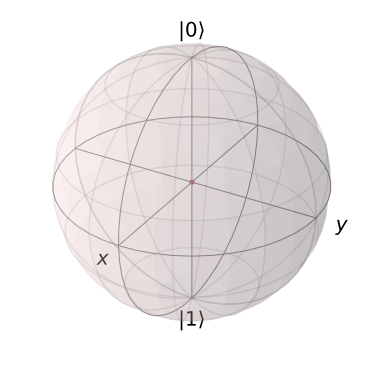

In [4]:
plot_bloch_vector([0, 0, 0])

La superficie de esta esfera, junto con el producto interno entre los vectores de estado de qubit, es un espacio de Hilbert válido. Además, la condición de normalización se cumple, ya que el radio de la esfera de Bloch es $1$ y, por lo tanto, la longitud al cuadrado de cada vector también debe ser igual a $1$.

Una nota final sobre los espacios de Hilbert y el producto interno es su relación con las **matrices unitarias** . Las matrices unitarias son importantes en el cálculo cuántico porque **conservan el producto interno** , lo que significa que no importa cómo transforme un vector en una secuencia de matrices unitarias, la condición de normalización sigue siendo válida. Esto se puede demostrar en la siguiente prueba corta:

<br>

$$\langle\psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\daga} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$

<br>

Esto significa que la evolución unitaria envía estados cuánticos a otros estados cuánticos válidos. Para un espacio de Hilbert de un solo qubit, representado por la esfera de Bloch, las transformaciones unitarias corresponden a rotaciones de vectores de estado a diferentes puntos de la esfera, sin cambiar la longitud del vector de estado de ninguna manera.

### Productos exteriores y productos tensores

Los productos internos no son la única forma de multiplicar vectores. Ocasionalmente, cambiaremos el orden de bra y ket para obtener el **producto exterior,** cuyo resultado es una matriz, en lugar de un solo número. Para dos vectores $|a\rangle$ y $|b\rangle$ en un espacio de Hilbert, denotamos el producto externo como $| a \rangle$$\langle b |$, donde $\langle b |$ es igual a la transpuesta conjugada de $|b\rangle$, como antes. Esto nos da:

<br>

$$| a \rangle \langle b | \ = \ \begin{pmatrix} a_1 \ a_2 \ \vdots \ a_n \end{pmatrix} \begin{pmatrix} b_1^{ *} &amp; b_2^{* } &amp; \cdots &amp; b_n^{ *} \end{pmatrix} \ = \begin{pmatrix} a_1 b_1^{* } &amp; a_1 b_2^{ *} &amp; \cdots &amp; a_1 b_n^{* } \ a_2 b_1^{ *} &amp; a_2 b_2^{* } &amp; &amp; \vdots \ \vdots &amp; &amp; \ddots &amp; \ vdots \ a_n b_1^{ *} &amp; \cdots &amp; \cdots &amp; a_n b_n^{* } \end{pmatrix}$$

<br>

Los productos externos nos brindan una forma de representar puertas cuánticas con sujetadores y kets, en lugar de matrices. Por ejemplo, tome la puerta Pauli-X:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix}$$

<br>

Podemos representar esto como la suma $|0\rangle$$\langle 1|$ + $|1\rangle$$\langle 0|$, ya que:

<br>

$$|0\ángulo \ángulo 1| \ + \ |1\ángulo \ángulo 0| \ = \ \begin{pmatrix} 1 \ 0 \end{pmatrix} \begin{pmatrix} 0 &amp; 1 \end{pmatrix} + \begin{pmatrix} 0 \ 1 \end{pmatrix} \begin{pmatrix} 1 &amp; 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 &amp; 1 \ 0 &amp; 0 \end{pmatrix} + \begin{pmatrix} 0 &amp; 0 \ 1 &amp; 0 \end{pmatrix} \ = \ \begin{ pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix} \ = \ \sigma_x $$

<br>

El producto exterior es, de hecho, un ejemplo específico del **producto tensorial** más general que se usa para multiplicar espacios vectoriales.

En la mayoría de los casos, verá el producto tensorial utilizado para describir el estado compartido de dos o más qubits. Observe aquí que el producto tensorial no requiere tomar una de las transpuestas conjugadas del vector como lo hace el producto externo: estamos multiplicando dos kets en lugar de un ket y un sujetador. El producto tensorial de los vectores $|a \rangle$ y $|b\rangle$, escrito $|a\rangle \otimes |b\rangle$ o $|ab\rangle$, es igual a:


<br>


$$ |a\rangle \otimes |b\rangle \ = \ \begin{pmatrix} a_{1} \begin{pmatrix} b_{1} \ b_{2} \end{pmatrix} \ a_{2} \begin {pmatrix} b_{1} \ b_{2} \end{pmatrix} \end{pmatrix} \ = \begin{pmatrix} a_{1} b_{1} \ a_{1} b_{2} \ a_{2 } b_{1} \ a_{2} b_{2} \end{pmatriz} $$

<br>

Si queremos actuar sobre el nuevo vector producido por el producto tensorial de $|a \rangle$ y $|b\rangle$, también tendremos que tomar el producto tensorial de los operadores con los que esperamos actuar sobre ellos . El producto tensorial de las matrices *A* y *B* es igual a:

<br>

$$ A \otimes B \ = \ \begin{pmatrix} a_{11} B &amp; \cdots &amp; a_{1n} B \ \vdots &amp; \ddots &amp; \vdots \ a_{m1} B &amp; \cdots &amp; a_{mn } B \end{matrix} $$

<br>

Puede encontrar ejemplos del producto tensorial en acción [aquí.](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#1.-Representing-Multi-Qubit-States-)

### Vectores propios y valores propios

Considere la relación de la forma:

$$A |v\rangle \ = \ \lambda |v\rangle,$$

donde $A$ es una matriz y $\lambda$ es un número. Si nos dan una matriz $A$ y necesitamos encontrar los vectores $|v\rangle$ y los números $\lambda$ que satisfacen esta relación, llamamos a estos vectores **vectores propios** y sus correspondientes multiplicadores numéricos **valores propios** . Los vectores propios y los valores propios tienen un significado físico muy importante en el contexto de la mecánica cuántica y, por lo tanto, de la computación cuántica. Dados algunos $A$, explotamos un truco interesante para encontrar el conjunto de vectores propios y los valores propios correspondientes. Reordenemos nuestra ecuación como:

<br>

$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$

<br>

Si multiplicamos ambos lados de esta ecuación por la matriz inversa $(A \ - \ \lambda \mathbb{I})^{-1}$, obtenemos $|v\rangle \ = \ 0$. Esta es una solución extraña (no permitimos que los vectores propios sean el vector nulo, o cualquier combinación de valor propio/matriz satisfaría la relación vector propio-valor propio). Por lo tanto, para encontrar los vectores propios y los valores propios permitidos, debemos suponer que la matriz $(A \ - \ \lambda \mathbb{I})$ **no es invertible** . Recuerde de antes que la inversa de una matriz es de la forma:

<br>$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M),$$<br>

donde $F(M)$ es una nueva matriz (cuyos detalles no importan en este contexto) que depende de $M$. La parte de esta ecuación que nos interesa es la inversa del determinante. Si el determinante de la matriz $M$ es $0$, se deduce que la inversa no está definida y, por lo tanto, tampoco lo está la inversa, lo que hace que la matriz $M$ no sea invertible. Por lo tanto, requerimos que:

<br>

$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$

<br>

A partir de esto, podemos determinar $\lambda$, luego reemplazamos cada valor de $\lambda$ en la ecuación original para obtener los vectores propios. Hagamos un ejemplo y encontremos los vectores propios/valores propios de la matriz Pauli-Z, $\sigma_z$. Empezamos con:

<br>

$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda &amp; 0 \ 0 &amp; -1 \ - \ \lambda \end{pmatrix} \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \ 1 \ - \ \lambda^2 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$

<br>

La ecuación, en términos de $\lambda$, que resulta al resolver el determinante se llama **polinomio característico** . Luego podemos reemplazar cada uno de estos valores en la ecuación original. Empezaremos con $\lambda \ = \ 1$:

<br>

$$\begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \end {pmatrix} \begin{pmatrix} a \ b \end{pmatrix} \ = \ \begin{pmatrix} a \ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \ -b \end{pmatrix} \ = \ \begin{pmatrix} a \b \end{pmatrix}$$

<br>

$a$ puede ser cualquier número y $b$ es $0$; por lo tanto, el vector $\begin{pmatrix} 1 \ 0 \end{pmatrix}$ forma una base para todos los vectores que satisfacen nuestra relación y, por lo tanto, es el vector propio que corresponde al valor propio de $1$. Hacemos lo mismo para $\lambda \ = \ -1$:

<br>

$$\begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \ end{pmatrix} \begin{pmatrix} a \ b \end{pmatrix} \ = \ \begin{pmatrix} -a \ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \ -b \end{ pmatrix} \ = \ \begin{pmatrix} -a \ -b \end{pmatrix}$$

<br>

Esta vez, $b$ puede ser cualquier número y $a$ es $0$; por lo tanto, nuestro vector base (y nuestro vector propio correspondiente a $-1$) es $\begin{pmatrix} 0 \ 1 \end{pmatrix}$. Observe cómo los vectores propios de la matriz Pauli-Z son los estados de base computacional cuánticos $|0\rangle$ y $|1\rangle$. Esto no es una coincidencia. Por ejemplo, cuando medimos un qubit en la base $Z$, nos referimos a una medida que colapsa el estado del qubit en uno de los vectores propios de la matriz Z, ya sea $|0\rangle$ o $|1\rangle PS

### Exponenciales de matrices

La noción de una matriz exponencial es un concepto muy específico pero extremadamente importante. A menudo vemos transformaciones unitarias en la forma:

<br>$$U\=\e^{i\gamma H},$$<br>

donde $H$ es una matriz hermítica y $\gamma$ es un número real. Es bastante simple demostrar que todas las matrices de esta forma son unitarias. Tomando la transpuesta conjugada de $U$, obtenemos:

<br>

$$U^{\daga} \ = \ \Big( e^{i\gamma H} \Big)^{\daga} \ = \ e^{-i \gamma H^{\daga}}$$

<br>

Pero como $H$ es hermitiano, sabemos que $H^{\dagger} \ = \H$, así:

<br>

$$e^{-i \gamma H^{\daga}} \ = \e^{-i \gamma H} \ \Rightarrow \ U^{\daga} U \ = \e^{-i \gamma H } e^{i\gamma H} \ = \ \mathbb{I}$$

<br>

Quizás se pregunte por qué una matriz dentro de un exponencial aún puede considerarse una matriz. La respuesta se vuelve más clara cuando expandimos nuestra función exponencial como una serie de Taylor. Recuerde del cálculo que una serie de Taylor es esencialmente una forma de escribir cualquier función como un polinomio de grado infinito, y la idea principal es elegir los términos del polinomio y centrarlo en algún punto $x_0$ que se encuentra en la función que estamos tratando para transformar en el polinomio, tal que la derivada cero, primera, segunda, tercera, etc. es la misma tanto para la función original como para el polinomio. Por lo tanto, escribimos nuestra serie de Taylor en la forma:

<br>$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n} {n!},$$<br>

donde $g(x)$ es el polinomio, $f(x)$ es la función original, $f^{(n)}$ es la $n$-ésima derivada de $f$ y $x_0$ es la punto en el que centramos la función. Como no estamos aproximando, $x_0$ no importa, así que por simplicidad, elegimos $x_0 \ = \ 0$, y la serie de Taylor se convierte en una serie de Maclaurin:

<br>

$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$

<br>

Si elegimos $f(x) \ = \ e^x$, podemos crear un polinomio equivalente usando la serie de Maclaurin. Como la derivada de $e^x$ es simplemente $e^x$, y evidentemente, $e^0\=\1$, obtenemos:

<br>

$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$

<br>

Así, para alguna matriz, $i \gamma H$, obtenemos:

<br>

$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$

<br>

Por tanto, la exponencial de una matriz es una matriz. Es una suma infinita de potencias de matrices, que sin duda parece demasiado compleja... pero el punto aquí es que la matriz exponencial es de hecho una matriz.

Ahora estamos en condiciones de demostrar un hecho muy importante: si tenemos una matriz $B$ tal que $B^2 \ = \ \mathbb{I}$ (esto se llama **matriz involutiva** ), entonces:

<br>

$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$

<br>

Empezamos con la serie de Maclaurin:

<br>

$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$

<br>

Observe que podemos dividir la sumatoria en una parte imaginaria y una parte real, según si $n$ es par o impar en cada término de la suma:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^ {\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\ infinito} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$

<br>

Ahora, encontremos la serie de Maclaurin para $\sin x$ y $\cos x$. Empezaremos con $f(x) \ = \ \sin x$:

<br>

$$\sen x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$

<br>

La derivada de $\sin x$ es **cíclica** en cierto sentido (cada flecha representa la derivada de la función anterior):

<br>

$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$

<br>

Como $\sin (0) \ = \ 0$ y $\cos (0) \ = \ 1$, todos los términos con $n$ pares se convierten en $0$, y obtenemos:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^nx^{2n \ + \ 1}}{(2n \ + \ 1)!}$$

<br>

Esto se parece al término impar de nuestra ecuación original. De hecho, si hacemos $x \ = \ \gamma B$, son exactamente iguales. Seguimos un proceso que es casi idéntico para mostrar que los términos pares son los mismos que la serie de Maclaurin para $f(x) \ = \ \cos x$:

<br>

$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$

<br>

$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$

<br>

$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^nx^{2n}}{(2n)!}$$

<br>

Volvamos a la ecuación original. Recuerda que $B^2 \ = \ \mathbb{I}$. Para cualquier $n$, tenemos:

<br>

$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$

<br>

$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \B$$

<br>

Sustituyendo en esta nueva información, obtenemos:

<br>

$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\ gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$

<br>

Este hecho es extremadamente útil en la computación cuántica. Considere las matrices de Pauli:

<br>

$$\sigma_x \ = \ \begin{pmatrix} 0 &amp; 1 \ 1 &amp; 0 \end{pmatrix}$$

<br>

$$\sigma_y \ = \ \begin{pmatrix} 0 &amp; -i \i &amp; 0 \end{pmatrix}$$

<br>

$$\sigma_z \ = \ \begin{pmatrix} 1 &amp; 0 \ 0 &amp; -1 \end{pmatrix}$$

<br>

Estas matrices se encuentran entre las "puertas cuánticas" fundamentales utilizadas para manipular qubits. Estas operaciones no sólo son unitarias, también son **hermíticas** e **involutivas** . Esto significa que una matriz de la forma $e^{i \gamma \sigma_k} \ k \ \in \ {x, \ y, \ z}$ no es solo una matriz unitaria válida que puede actuar sobre un vector de estado cuántico ( un qubit), pero se puede expresar usando la relación seno-coseno que acabamos de probar. Esto es muy poderoso y se ve a lo largo de la teoría computacional cuántica, ya que las puertas de este tipo se usan todo el tiempo.

Un último hecho importante sobre las matrices exponenciales: si tenemos una matriz $M$, con vectores propios $|v\rangle$ y valores propios correspondientes $\lambda$, entonces:

<br>

$$e^{M} |v\rangle \ = \ e^\lambda |v\rangle$$

<br>

Este es mucho más sencillo de probar:

<br>

$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{M^n |v\rangle}{n!} \ = \\displaystyle\ sum_{n \ = \ 0}^{\infty} \ \frac{\lambda^n |v\rangle}{n!} \ = \e^\lambda |v\rangle$$

<br>

Este hecho también es muy útil. Al crear circuitos cuánticos que simulan un cierto hamiltoniano (especialmente para circuitos variacionales), con frecuencia usamos puertas de la forma $e^{i \gamma \sigma_z}$. Dado que $|0\rangle$ y $|1\rangle$ son vectores propios de $\sigma_z$, podemos determinar fácilmente matemáticamente que $e^{i \gamma \sigma_z}$ agregará una fase de $e^{i \ gamma}$ a $|0\rangle$, y agregará una fase de $e^{-i\gamma}$ a $|1\rangle$. Entonces podemos construir esta puerta en términos de $CNOT$ y puertas de fase/rotación con bastante facilidad, ya que conocemos el resultado matemático de la puerta en cada uno de los estados de la base computacional.

Este hecho no solo se aplica a exponenciales de la puerta $\sigma_z$. Por ejemplo, podemos determinar el resultado de una puerta de la forma $e^{i \gamma \sigma_x}$ en los vectores propios de $\sigma_x$, $(|0\rangle \ + \ |1\rangle)/\ sqrt{2}$ y $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$. Lo mismo se aplica a las exponenciales de la matriz $\sigma_y$.

## Referencias

[1] Cayley, Arturo. "Una memoria sobre la teoría de las matrices". Transacciones filosóficas de la Royal Society de Londres, vol. 148, 1858, págs. 17–37. JSTOR.

[2] Una nueva rama de las matemáticas: la Ausdehnungslehre de 1844 y otras obras: Hermann Grassmann, Lloyd C. Kannenberg: 9780812692761